INFO6105 Instructor: Dr. Handan Liu

Homework 4

Grading: total 100 points

Dhruvil Shah

In [1]:
# Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
# import iris data to model Svm classifier (3 points)

iris = datasets.load_iris()

In [3]:
# Using the DESCR key (description) over the iris_dataset to describ the dataset (3 points)

print ("Iris data set Description", iris['DESCR'])

Iris data set Description .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ====

In [5]:
# To get the iris features and the target classes (3 points)
X = iris.data
y = iris.target


In [6]:
# To check the target data (3 points)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


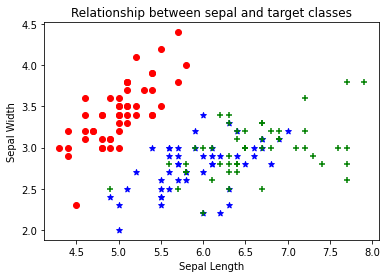

In [7]:
X = iris.data[:,:2]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('Relationship between sepal and target classes')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

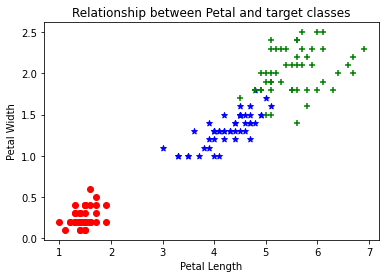

In [8]:
X = iris.data[:,2:]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('Relationship between Petal and target classes')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, test_size=0.3, random_state=0)
lin_svc = svm.SVC(kernel='linear',gamma='auto').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf',gamma='auto').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3,gamma='auto').fit(X_train, y_train)



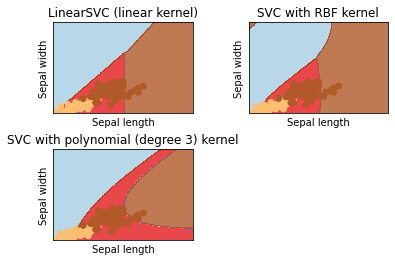

In [10]:
# the step of the grid
h = .02 
# to create the grid , so that we can plot the images on it
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# the title of the graph
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((lin_svc, rbf_svc, poly_svc)):
    # to plot the edge of different classes
    # to create a 2*2 grid , and set the i image as current image
    plt.subplot(2, 2, i + 1) 
    # set the margin between different sub-plot
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # SVM input :xx and yy output: an array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # to plot the result
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()



In [11]:
lin_svc_pre = lin_svc.predict(X_test)
acc_lin_svc = sum(lin_svc_pre==y_test)/len(y_test)
rbf_svc_pre = rbf_svc.predict(X_test)
acc_rbf_svc = sum(rbf_svc_pre==y_test)/len(y_test)
poly_svc_pre = poly_svc.predict(X_test)
acc_poly_svc = sum(poly_svc_pre==y_test)/len(y_test)
print('Accuracy (Linear Kernel) - ', acc_lin_svc)
print('Accuracy (RBF Kernel) - ',acc_rbf_svc)
print('Accuracy (Polynomial Degree(3) Kernel) - ',acc_poly_svc)


Accuracy (Linear Kernel) -  0.8
Accuracy (RBF Kernel) -  0.8
Accuracy (Polynomial Degree(3) Kernel) -  0.7777777777777778


In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,2:], iris.target, test_size=0.3, random_state=0)
lin_svc = svm.SVC(kernel='linear',gamma='auto').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf',gamma='auto').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3,gamma='auto').fit(X_train, y_train)


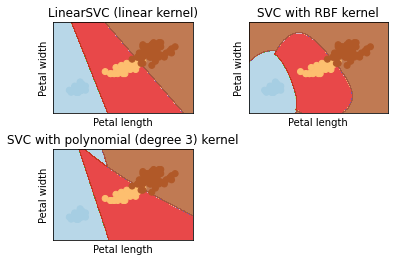

In [14]:
# the step of the grid
h = .02 
# to create the grid , so that we can plot the images on it
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# the title of the graph
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate(( lin_svc, rbf_svc, poly_svc)):
    # to plot the edge of different classes
    # to create a 2*2 grid , and set the i image as current image
    plt.subplot(2, 2, i + 1) 
    # set the margin between different sub-plot
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # SVM input :xx and yy output: an array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # to plot the result
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [15]:
lin_svc_pre = lin_svc.predict(X_test)
acc_lin_svc = sum(lin_svc_pre==y_test)/len(y_test)
rbf_svc_pre = rbf_svc.predict(X_test)
acc_rbf_svc = sum(rbf_svc_pre==y_test)/len(y_test)
poly_svc_pre = poly_svc.predict(X_test)
acc_poly_svc = sum(poly_svc_pre==y_test)/len(y_test)
print('Accuracy (Linear Kernel) - ',acc_lin_svc)
print('Accuracy (RBF Kernel) - ',acc_rbf_svc)
print('Accuracy (Polynomial Degree(3) Kernel) - ',acc_poly_svc)

Accuracy (Linear Kernel) -  0.9777777777777777
Accuracy (RBF Kernel) -  0.9777777777777777
Accuracy (Polynomial Degree(3) Kernel) -  0.9777777777777777
